# Chapter 4: Multi-Pathogen/Multi-Host Models

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Environment-Preparation" data-toc-modified-id="Environment-Preparation-2">Environment Preparation</a></span></li><li><span><a href="#Program-4.1:-SIR-model-with-partial-immunity" data-toc-modified-id="Program-4.1:-SIR-model-with-partial-immunity-3">Program 4.1: SIR model with partial immunity</a></span></li><li><span><a href="#Program-4.2:-Partial-immunity-model-that-cycles" data-toc-modified-id="Program-4.2:-Partial-immunity-model-that-cycles-4">Program 4.2: Partial immunity model that cycles</a></span><ul class="toc-item"><li><span><a href="#4.2_main" data-toc-modified-id="4.2_main-4.1">4.2_main</a></span></li><li><span><a href="#4.2_a" data-toc-modified-id="4.2_a-4.2">4.2_a</a></span></li></ul></li><li><span><a href="#Program-4.4:-SIR-model-for-mosquito-vectors" data-toc-modified-id="Program-4.4:-SIR-model-for-mosquito-vectors-5">Program 4.4: SIR model for mosquito vectors</a></span></li></ul></div>

## Introduction

Chapter 4 discusses heterogeneties of the pathogen and heterogeneties of the host. The chapter touches on interaction between competing strains of infection, different levels of immunity (partial, full), vector transmitted diseases and zoonoses. For more details please refer back to the book (http://modelinginfectiousdiseases.org/).

## Environment Preparation

In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
from matplotlib.font_manager import FontProperties as fmp

In [2]:
pl.style.use('seaborn-whitegrid')
pl.rcParams['font.family'] = "sans-serif"

## Program 4.1: SIR model with partial immunity

[[1.00000000e-01 1.00000000e-04 2.00000000e-02 ... 5.00000000e-01
  0.00000000e+00 3.79800000e-01]
 [1.00013817e-01 9.33177094e-05 2.00118747e-02 ... 4.99976912e-01
  1.65989371e-05 3.79786417e-01]
 [1.00027558e-01 8.75259418e-05 2.00228499e-02 ... 4.99953838e-01
  3.09732427e-05 3.79775194e-01]
 ...
 [9.58519856e-02 2.87685721e-05 2.19998667e-02 ... 5.28930991e-01
  7.93763557e-05 3.52869242e-01]
 [9.58518749e-02 2.87898319e-05 2.20002374e-02 ... 5.28930256e-01
  7.94346487e-05 3.52869655e-01]
 [9.58517635e-02 2.88110998e-05 2.20006113e-02 ... 5.28929510e-01
  7.94929756e-05 3.52870076e-01]]


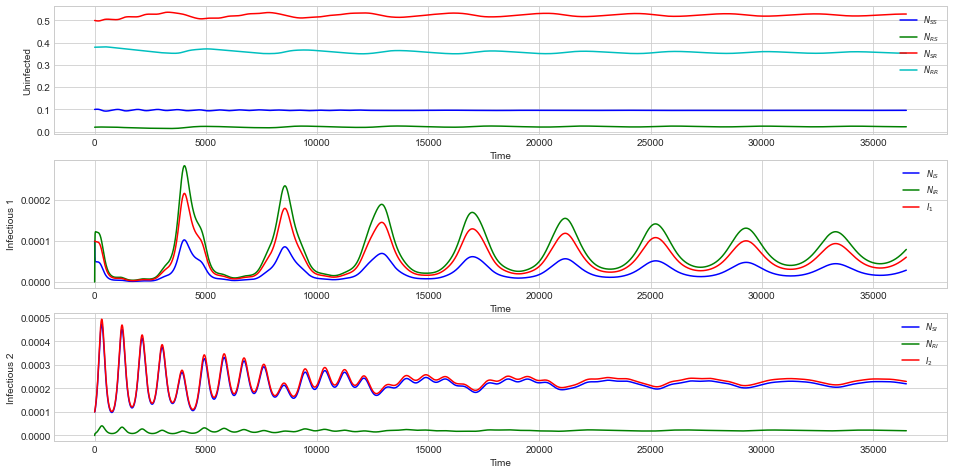

In [3]:
# Enviroment Preparation
import scipy.integrate as spi
import numpy as np
import pylab as pl

# Parameters
beta=np.array([260, 520])/365.0;
gamma=np.array([1, 1])/7.0;
nu=mu=1/(70*365.0);
alpha=np.array([0.5, 0.4]);
a=np.array([0.4, 0.5]);
ND=MaxTime=100*365;
TS=1.0
NSS=0.1; NIS=1e-4;NRS=0.02;NRI=0.0;NSI=1e-4;NSR=0.5;NIR=0.0
I=np.array([NSS, NIS,NRS,NRI,NSI,NSR,NIR])

INPUT=np.array([NSS, NIS,NRS,NRI,NSI,NSR,NIR,1-sum(I)])

# Moeel Definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((8))
	V = INP
	lambda1=beta[0]*(V[1]+a[0]*V[6])
	lambda2=beta[1]*(V[4]+a[1]*V[3])
	Y[0] = mu - V[0] * (lambda1 + lambda2) - mu * V[0]
	Y[1] = V[0]*lambda1 - gamma[0]*V[1] - mu*V[1]
	Y[2] = gamma[0]*V[1] - alpha[1]*V[2]*lambda2 - mu*V[2]
	Y[3] = alpha[1]*V[2]*lambda2 - gamma[1]*V[3] - mu*V[3]
	Y[4] = V[0] * lambda2 - gamma[1]*V[4] - mu*V[4]
	Y[5] = gamma[1]*V[4] - alpha[0]*V[5]*lambda1 - mu*V[5]
	Y[6] = alpha[0]*V[5]*lambda1 - gamma[0]*V[6] - mu*V[6]
	Y[7] = gamma[0] * V[6] + gamma[1]*V[3] - mu * V[7]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

# Print Results
print (RES)

#Ploting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(RES[:,0], 'b-', label=r'$N_{SS}$')
pl.plot(RES[:,2], 'g-', label=r'$N_{RS}$')
pl.plot(RES[:,5], 'r-', label=r'$N_{SR}$')
pl.plot(RES[:,7], 'c-', label=r'$N_{RR}$')
pl.xlabel ('Time')
pl.ylabel ('Uninfected')
pl.legend(loc=1, prop = fmp(size='smaller'))
pl.subplot(312)
pl.plot(RES[:,1], 'b-', label=r'$N_{IS}$')
pl.plot(RES[:,6], 'g-', label=r'$N_{IR}$')
pl.plot((RES[:,1]+a[0]*RES[:,6]), 'r-', label=r'$I_1$')
pl.xlabel ('Time')
pl.ylabel ('Infectious 1')
pl.legend(loc=1, prop = fmp(size='smaller'))
pl.subplot(313)
pl.plot(RES[:,4], 'b-', label=r'$N_{SI}$')
pl.plot(RES[:,3], 'g-', label=r'$N_{RI}$')
pl.plot((RES[:,4]+a[1]*RES[:,3]), 'r-', label=r'$I_2$')
pl.xlabel ('Time')
pl.ylabel ('Infectious 2')
pl.legend(loc=1, prop = fmp(size='smaller'))

## Program 4.2: Partial immunity model that cycles

### 4.2_main

[[0.08       0.1        0.1        ... 0.02       0.1        0.01      ]
 [0.08757083 0.10013574 0.11010178 ... 0.00615099 0.02963212 0.00392087]
 [0.10043275 0.11048153 0.12480356 ... 0.00253067 0.01178007 0.00204471]
 ...
 [0.1433952  0.14703395 0.14339586 ... 0.00703138 0.11761036 0.0070132 ]
 [0.14649539 0.13842644 0.14650286 ... 0.00225049 0.06229696 0.00224542]
 [0.15624309 0.14278714 0.1562513  ... 0.00084929 0.03271895 0.00084768]]


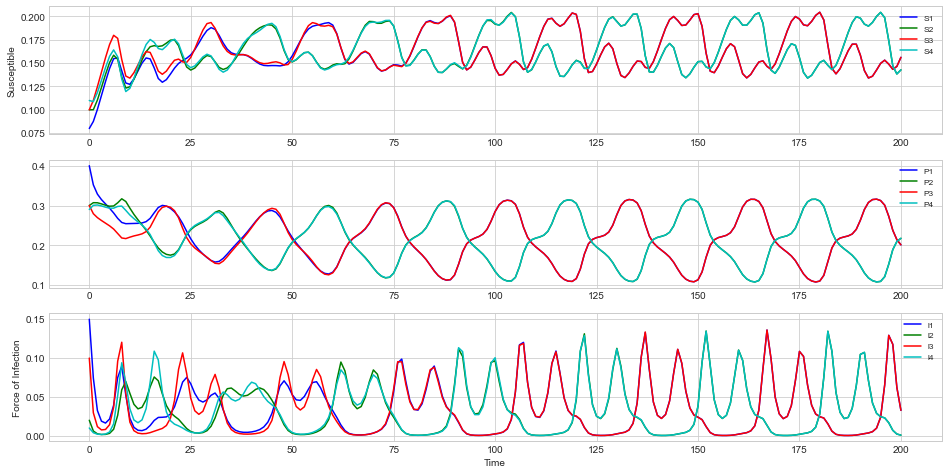

In [4]:
# Parameters
N=4;
beta=40.0;
gamma=9.98;
mu=0.02;
a=0.4;
S0=np.array([0.08, 0.1, 0.1, 0.11]);
P0=np.array([0.4, 0.3, 0.3, 0.29]);
lambda0=np.array([0.15, 0.02, 0.1, 0.01]);
ND=MaxTime=200;
TS=1.0
scen="main"

#####################################################################################
### To be compatible with other versions of programs the
### following options are available. To try some of them
### uncomment the code (remove '#'):
#####################################################################################
### You may also wish to try:
# (N,beta,gamma,mu,a,S0,P0,lambda0,ND, scen)=(4,40,9.98,0.02,0.25,([0.25, 0.14, 0.25, 0.14]),([0.016, 0.55, 0.016, 0.55]),([0.07, 1e-12, 0.07, 1e-12]),200, "a")
INPUT=np.hstack((S0,P0,lambda0))

# Model Defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3*N))
	V = INP
	for i in range(N):
		r=np.mod(i+1,N)
		l=np.mod(i+N-1,N)
		Y[i] = mu - V[i]*(V[(2*N)+i]+V[(2*N)+l]+V[(2*N)+r]) - mu*V[i]
		Y[N+i] =  V[i] * (V[(2*N)+l] + V[(2*N)+r]) - V[N+i] * V[(2*N)+i] - mu*V[N+i]
		Y[(2*N)+i] = beta * (V[i] + a * V[N+i]) * V[(2*N)+i] - gamma*V[(2*N)+i] - mu*V[(2*N)+i]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Print Results
print (RES)

#Ploting
pl.figure(figsize=(16,8))
pl.subplot(311)
pl.plot(RES[:,0], 'b-', label='S1')
pl.plot(RES[:,1], 'g-', label='S2')
pl.plot(RES[:,2], 'r-', label='S3')
pl.plot(RES[:,3], 'c-', label='S4')
#pl.xlabel ('Time')
pl.ylabel ('Susceptible')
pl.legend(loc=1, prop=fmp(size='smaller'))
pl.subplot(312)
pl.plot(RES[:,N+0], 'b-', label='P1')
pl.plot(RES[:,N+1], 'g-', label='P2')
pl.plot(RES[:,N+2], 'r-', label='P3')
pl.plot(RES[:,N+3], 'c-', label='P4')
#pl.xlabel ('Time')
pl.legend(loc=1, prop=fmp(size='smaller'))
pl.subplot(313)
pl.plot(RES[:,2*N+0], 'b-', label='l1')
pl.plot(RES[:,2*N+1], 'g-', label='l2')
pl.plot(RES[:,2*N+2], 'r-', label='l3')
pl.plot(RES[:,2*N+3], 'c-', label='l4')
pl.xlabel ('Time')
pl.ylabel ('Force of Infection')
pl.legend(loc=1, prop=fmp(size='smaller'))


### 4.2_a

[[2.50000000e-01 1.40000000e-01 2.50000000e-01 ... 1.00000000e-12
  7.00000000e-02 1.00000000e-12]
 [2.46610940e-01 1.36698687e-01 2.46610940e-01 ... 2.95790633e-12
  7.65497351e-02 2.95790633e-12]
 [2.43361193e-01 1.33749077e-01 2.43361193e-01 ... 8.39871399e-12
  7.15984244e-02 8.39871399e-12]
 ...
 [1.33624600e-01 1.36554967e-01 1.33624600e-01 ... 1.21274523e-05
  2.95409869e-02 1.21274523e-05]
 [1.47976571e-01 1.47987921e-01 1.47976571e-01 ... 7.94061602e-07
  1.42820382e-02 7.94061602e-07]
 [1.62993575e-01 1.61172156e-01 1.62993575e-01 ... 8.70742211e-08
  1.10053806e-02 8.70742211e-08]]


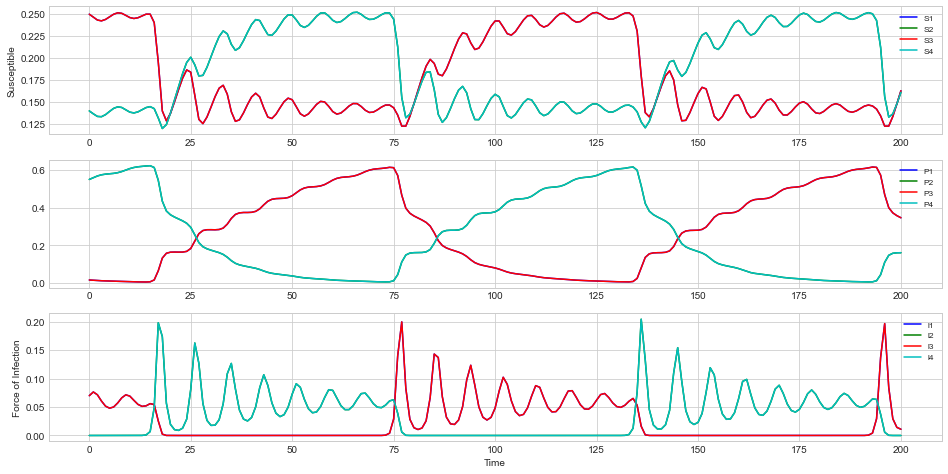

In [5]:
# Parameters
N=4;
beta=40.0;
gamma=9.98;
mu=0.02;
a=0.4;
S0=np.array([0.08, 0.1, 0.1, 0.11]);
P0=np.array([0.4, 0.3, 0.3, 0.29]);
lambda0=np.array([0.15, 0.02, 0.1, 0.01]);
ND=MaxTime=200;
TS=1.0
scen="main"

#####################################################################################
### To be compatible with other versions of programs the
### following options are available. To try some of them
### uncomment the code (remove '#'):
#####################################################################################
### You may also wish to try:
(N,beta,gamma,mu,a,S0,P0,lambda0,ND, scen)=(4,40,9.98,0.02,0.25,([0.25, 0.14, 0.25, 0.14]),([0.016, 0.55, 0.016, 0.55]),([0.07, 1e-12, 0.07, 1e-12]),200, "a")
INPUT=np.hstack((S0,P0,lambda0))

# Model Defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3*N))
	V = INP
	for i in range(N):
		r=np.mod(i+1,N)
		l=np.mod(i+N-1,N)
		Y[i] = mu - V[i]*(V[(2*N)+i]+V[(2*N)+l]+V[(2*N)+r]) - mu*V[i]
		Y[N+i] =  V[i] * (V[(2*N)+l] + V[(2*N)+r]) - V[N+i] * V[(2*N)+i] - mu*V[N+i]
		Y[(2*N)+i] = beta * (V[i] + a * V[N+i]) * V[(2*N)+i] - gamma*V[(2*N)+i] - mu*V[(2*N)+i]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Print Results
print (RES)

#Ploting
pl.figure(figsize=(16,8))
pl.subplot(311)
pl.plot(RES[:,0], 'b-', label='S1')
pl.plot(RES[:,1], 'g-', label='S2')
pl.plot(RES[:,2], 'r-', label='S3')
pl.plot(RES[:,3], 'c-', label='S4')
#pl.xlabel ('Time')
pl.ylabel ('Susceptible')
pl.legend(loc=1, prop=fmp(size='smaller'))
pl.subplot(312)
pl.plot(RES[:,N+0], 'b-', label='P1')
pl.plot(RES[:,N+1], 'g-', label='P2')
pl.plot(RES[:,N+2], 'r-', label='P3')
pl.plot(RES[:,N+3], 'c-', label='P4')
#pl.xlabel ('Time')
pl.legend(loc=1, prop=fmp(size='smaller'))
pl.subplot(313)
pl.plot(RES[:,2*N+0], 'b-', label='l1')
pl.plot(RES[:,2*N+1], 'g-', label='l2')
pl.plot(RES[:,2*N+2], 'r-', label='l3')
pl.plot(RES[:,2*N+3], 'c-', label='l4')
pl.xlabel ('Time')
pl.ylabel ('Force of Infection')
pl.legend(loc=1, prop=fmp(size='smaller'))


## Program 4.4: SIR model for mosquito vectors


[[1.00000000e+03 1.00000000e+04 1.00000000e+00 1.00000000e+00]
 [9.99214885e+02 1.00073158e+04 1.74289345e+00 5.66422820e+00]
 [9.96778515e+02 1.00081761e+04 4.08920043e+00 1.51876279e+01]
 ...
 [4.63785772e+00 1.00443791e+04 1.65133388e+00 4.65300112e+01]
 [4.63865913e+00 1.00443981e+04 1.65070297e+00 4.65109691e+01]
 [4.63947307e+00 1.00444170e+04 1.65008021e+00 4.64921296e+01]]


Text(0, 0.5, 'Infected Mosquitoes')

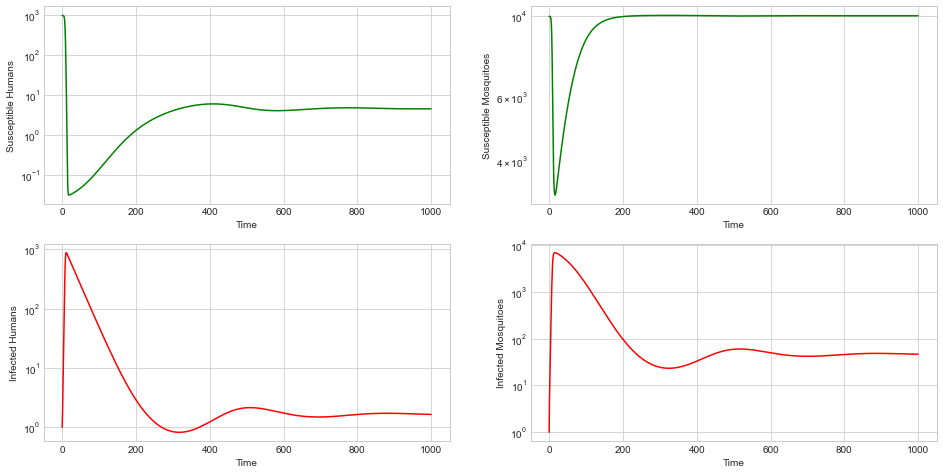

In [6]:
# Parameters
r=0.5/1e3;
beta=np.array([[0, 0.5], [0.8, 0]]);
gamma=np.array([0.033, 0]);
mu=np.array([5.5e-5, 0.143]);
nu=np.array([5.5e-2, 1.443e3]);
X0=np.array([1e3, 1e4]);
Y0=np.array([1, 1]);
ND=MaxTime=1000.0;
TS=1.0

INPUT=np.hstack((X0,Y0))

# Model Defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP
	Y[0] = nu[0] - V[0] * r * (beta[0][1]*V[3]) - mu[0] * V[0]
	Y[1] = nu[1] - V[1] * r * (beta[1][0]*V[2]) - mu[1] * V[1]
	Y[2] = V[0] * r * (beta[0][1]*V[3]) - gamma[0] * V[2] - mu[0] * V[2]
	Y[3] = V[1] * r * (beta[1][0]*V[2]) - mu[1] * V[3]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

# Print Results
print (RES)

#Ploting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.subplot(221)
pl.semilogy(RES[:,0], 'g', label='SH')
pl.xlabel('Time')
pl.ylabel('Susceptible Humans')
pl.subplot(222)
pl.semilogy(RES[:,1], 'g', label='SM')
pl.xlabel('Time')
pl.ylabel('Susceptible Mosquitoes')
pl.subplot(223)
pl.semilogy(RES[:,2], 'r', label='IH')
pl.xlabel('Time')
pl.ylabel('Infected Humans')
pl.subplot(224)
pl.semilogy(RES[:,3], 'r', label='IM')
pl.xlabel('Time')
pl.ylabel('Infected Mosquitoes')